# LivreQuanti2023: Script Classification and Writer Identification

Ce document exploite les données de l'entrepôt https://github.com/oriflamms/Script-Classification-Writer-Identification et correspond aux publications : 

## Références

Articles 
* Stutzmann, Dominique, Christopher Tensmeyer, and Vincent Christlein. « Writer Identification and Script Classification: Two Tasks for a Common Understanding of Cultural Heritage ». manuscript cultures, 15 (2020): 11-24. https://www.csmc.uni-hamburg.de/publications/mc/files/articles/mc15-02-stutzmann.pdf

Données 
* Stutzmann, Dominique, Tensmeyer, Christopher, & Christlein, Vincent. (2021). Script Classification and Writer Identification: Two Tasks for a Common Understanding of Cultural Heritage - Dataset [Data set]. Add. to: manuscript cultures (Vol. 15, pp. 11–24). Zenodo. https://doi.org/10.5281/zenodo.5527711


## Environnement

In [32]:
# Install and import the required packages

!pip install plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from plotly.offline import plot
import plotly.graph_objs as go
import seaborn as sns
import plotly.express as px


## Données

In [1]:
!wget https://raw.githubusercontent.com/oriflamms/LivreQuanti2023/main/ArtificialPaleography/data/ScriptClass/Icdar2017_Christlein_belonging.csv
!wget https://raw.githubusercontent.com/oriflamms/LivreQuanti2023/main/ArtificialPaleography/data/ScriptClass/Icdar2017_Christlein_distance.csv
!wget https://raw.githubusercontent.com/oriflamms/LivreQuanti2023/main/ArtificialPaleography/data/ScriptClass/Icdar2017_Tensmeyer_belonging.csv
!wget https://raw.githubusercontent.com/oriflamms/LivreQuanti2023/main/ArtificialPaleography/data/ScriptClass/Icdar2017_Tensmeyer_distance.csv
!wget https://raw.githubusercontent.com/oriflamms/LivreQuanti2023/main/ArtificialPaleography/data/ScriptClass/Ground-Truth.csv

'wget' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.
'wget' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.
'wget' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.
'wget' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.
'wget' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


In [24]:
# Load data files
ChrB = pd.read_csv("Icdar2017_Christlein_belonging.csv", sep=";")
ChrD = pd.read_csv("Icdar2017_Christlein_distance.csv", sep=";")
TenB = pd.read_csv("Icdar2017_Tensmeyer_belonging.csv", sep=";")
TenD = pd.read_csv("Icdar2017_Tensmeyer_distance.csv", sep=",")
GT = pd.read_csv("Ground-Truth.csv", sep=";")


# If repository cloned locally, use instead:
'''
ChrB = pd.read_csv("../data/ScriptClass/Icdar2017_Christlein_belonging.csv", sep=";")
ChrD = pd.read_csv("../data/ScriptClass/Icdar2017_Christlein_distance.csv", sep=";")
TenB = pd.read_csv("../data/ScriptClass/Icdar2017_Tensmeyer_belonging.csv", sep=";")
TenD = pd.read_csv("../data/ScriptClass/Icdar2017_Tensmeyer_distance.csv", sep=",")
GT = pd.read_csv("../data/ScriptClass/Ground-Truth.csv", sep=";")
'''

# Checking the size and type of data
print(ChrB.shape)
print(TenB.shape)
print(ChrD.shape)
print(TenD.shape)
print(GT.shape)

(2000, 18)
(2000, 18)
(2000, 2001)
(2000, 2001)
(2000, 4)


In [20]:
print(ChrB.head())
# print(TenB.head())
# print(ChrD.head())
# print(TenD.head())
print(GT.head())

   CHRISTLEIN_NB ICDAR_CLAMM                  OrigFileName  \
0              1    Task_1_3             IRHT_P_007646.tif   
1              2    Task_1_3  710146101_S_002_003_0041.tif   
2              3    Task_1_3             IRHT_P_003116.tif   
3              4    Task_1_3             IRHT_P_006800.tif   
4              5    Task_1_3             IRHT_P_009334.tif   

  Script_type_ICDAR2017  DATE_ICDAR                  FILENAME  SCRIPT_TYPE1  \
0             6_Hybrida          10             IRHT_P_007646      0.000628   
1             12_Uncial           1  710146101_S_002_003_0041      0.000225   
2            1_Caroline           2             IRHT_P_003116      0.438048   
3          11_Textualis           6             IRHT_P_006800      0.010826   
4          11_Textualis           6             IRHT_P_009334      0.000431   

   SCRIPT_TYPE10  SCRIPT_TYPE11  SCRIPT_TYPE12  SCRIPT_TYPE2  SCRIPT_TYPE3  \
0       0.006724       0.027742       0.018767      0.000147      0.003910

In [17]:
# Formatting the imported tables and adding metadata
ChrB.index = ChrB["FILENAME"]
TenB.index = ChrB["FILENAME"]
ChrB["Script_type_ICDAR2017"] = pd.Categorical(ChrB["Script_type_ICDAR2017"], categories=["1_Caroline", "2_Cursiva", "3_Half_Uncial", "4_Humanistic", "5_Humanistic_Cursive", "6_Hybrida", "7_Praegothica", "8_Semihybrida", "9_Semitextualis", "10_Textualis_meridionalis", "11_Textualis", "12_Uncial"])
TenB["Script_type_ICDAR2017"] = pd.Categorical(TenB["Script_type_ICDAR2017"], categories=["1_Caroline", "2_Cursiva", "3_Half_Uncial", "4_Humanistic", "5_Humanistic_Cursive", "6_Hybrida", "7_Praegothica", "8_Semihybrida", "9_Semitextualis", "10_Textualis_meridionalis", "11_Textualis", "12_Uncial"])


In [18]:
print(ChrB.head())

                          CHRISTLEIN_NB ICDAR_CLAMM  \
FILENAME                                              
IRHT_P_007646                         1    Task_1_3   
710146101_S_002_003_0041              2    Task_1_3   
IRHT_P_003116                         3    Task_1_3   
IRHT_P_006800                         4    Task_1_3   
IRHT_P_009334                         5    Task_1_3   

                                          OrigFileName Script_type_ICDAR2017  \
FILENAME                                                                       
IRHT_P_007646                        IRHT_P_007646.tif             6_Hybrida   
710146101_S_002_003_0041  710146101_S_002_003_0041.tif             12_Uncial   
IRHT_P_003116                        IRHT_P_003116.tif            1_Caroline   
IRHT_P_006800                        IRHT_P_006800.tif          11_Textualis   
IRHT_P_009334                        IRHT_P_009334.tif          11_Textualis   

                          DATE_ICDAR                 

## PCA (Principal Component Analysis)

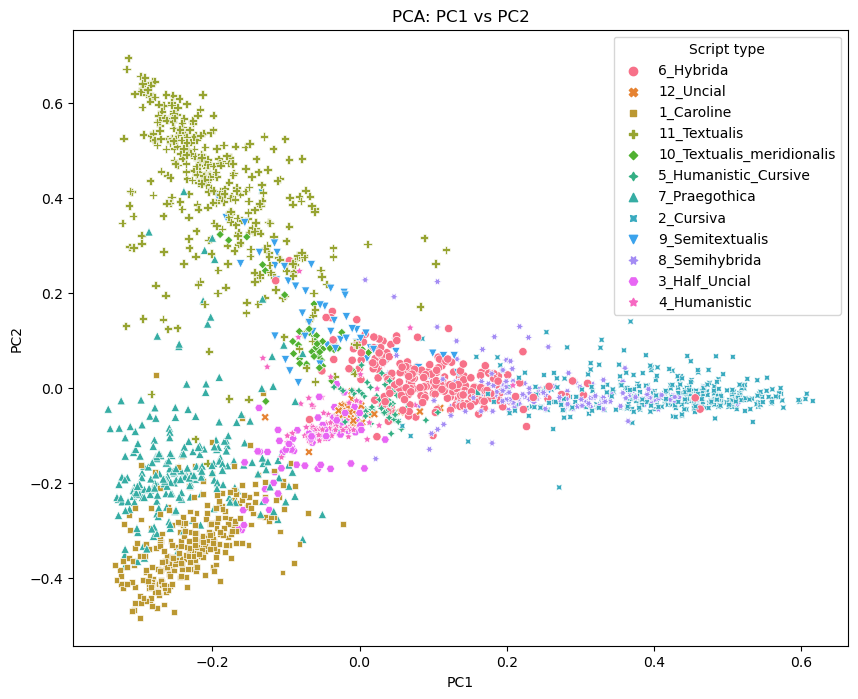

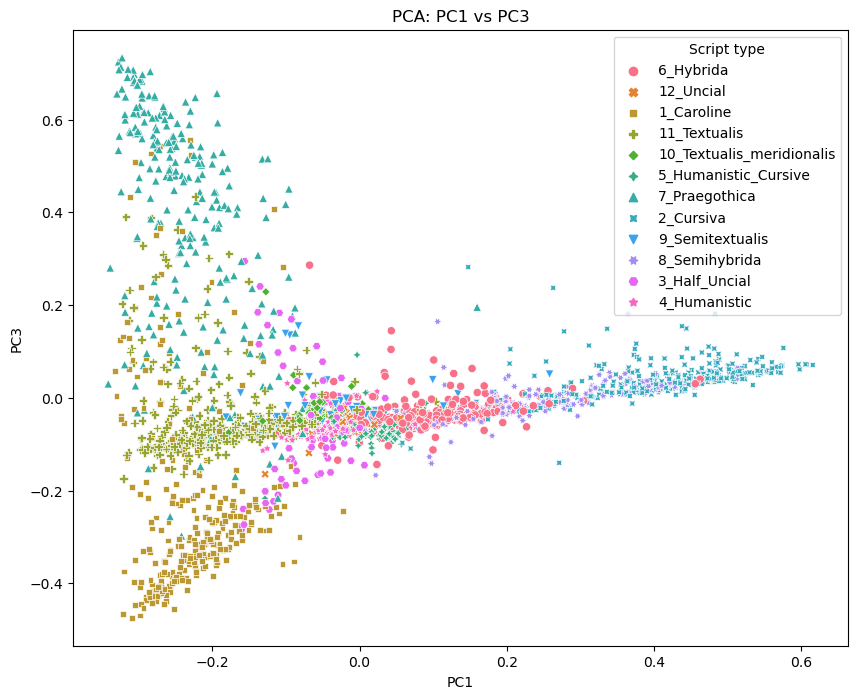

In [25]:


# Principal Component Analysis and visualizations on axes 1-2 and 1-3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Principal Component Analysis (PCA)
pca = PCA(n_components=3)
ChrB_pca = pca.fit_transform(ChrB.iloc[:, 6:18])  # Adjust the column range as per your data

# Visualize PCA on axes 1-2
plt.figure(figsize=(10, 8))
sns.scatterplot(x=ChrB_pca[:, 0], y=ChrB_pca[:, 1], hue=ChrB['Script_type_ICDAR2017'], style=ChrB['Script_type_ICDAR2017'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: PC1 vs PC2')
plt.legend(title='Script type')
plt.show()

# Visualize PCA on axes 1-3
plt.figure(figsize=(10, 8))
sns.scatterplot(x=ChrB_pca[:, 0], y=ChrB_pca[:, 2], hue=ChrB['Script_type_ICDAR2017'], style=ChrB['Script_type_ICDAR2017'])
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PCA: PC1 vs PC3')
plt.legend(title='Script type')
plt.show()




## RTSNE

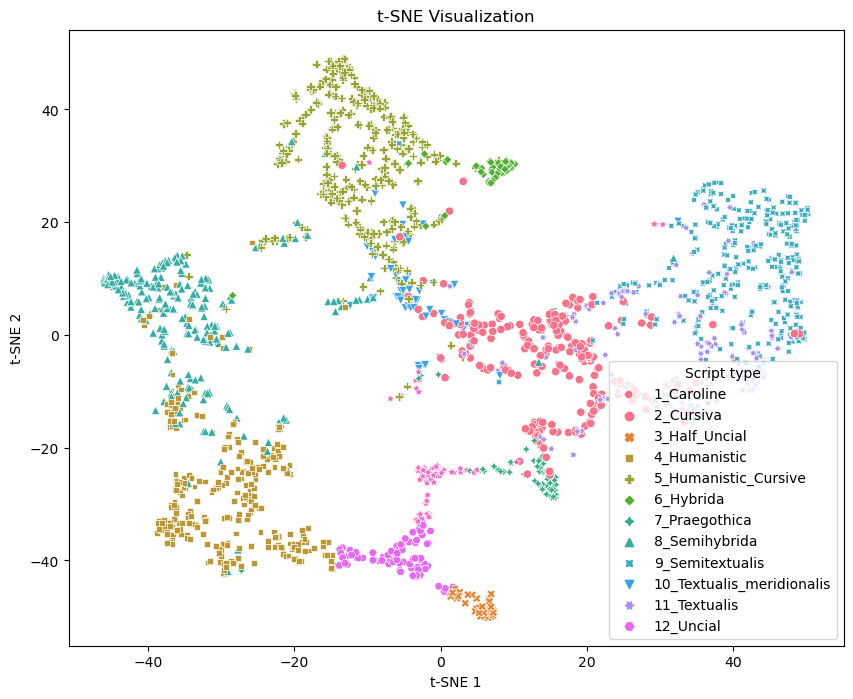

In [30]:
# t-SNE
tsne = TSNE(n_components=2, random_state=2000)
ChrB_tsne = tsne.fit_transform(ChrB.iloc[:, 6:18])  # Adjust the column range as per your data
# script_types = sorted(ChrB['Script_type_ICDAR2017'].unique())
script_types = ["1_Caroline", "2_Cursiva", "3_Half_Uncial", "4_Humanistic", "5_Humanistic_Cursive", "6_Hybrida",
                "7_Praegothica", "8_Semihybrida", "9_Semitextualis", "10_Textualis_meridionalis", "11_Textualis",
                "12_Uncial"]

# Visualize t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x=ChrB_tsne[:, 0], y=ChrB_tsne[:, 1], hue=ChrB['Script_type_ICDAR2017'], style=ChrB['Script_type_ICDAR2017'])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization')
plt.legend(title='Script type', labels=script_types)  
plt.show()

In [38]:
ChrB_tsne

array([[ 20.368784 , -15.499474 ],
       [  1.4616845, -45.864826 ],
       [-37.447655 , -13.648315 ],
       ...,
       [ -9.220891 ,   6.6136208],
       [ 32.19108  ,  12.407409 ],
       [-24.57171  ,  15.495742 ]], dtype=float32)

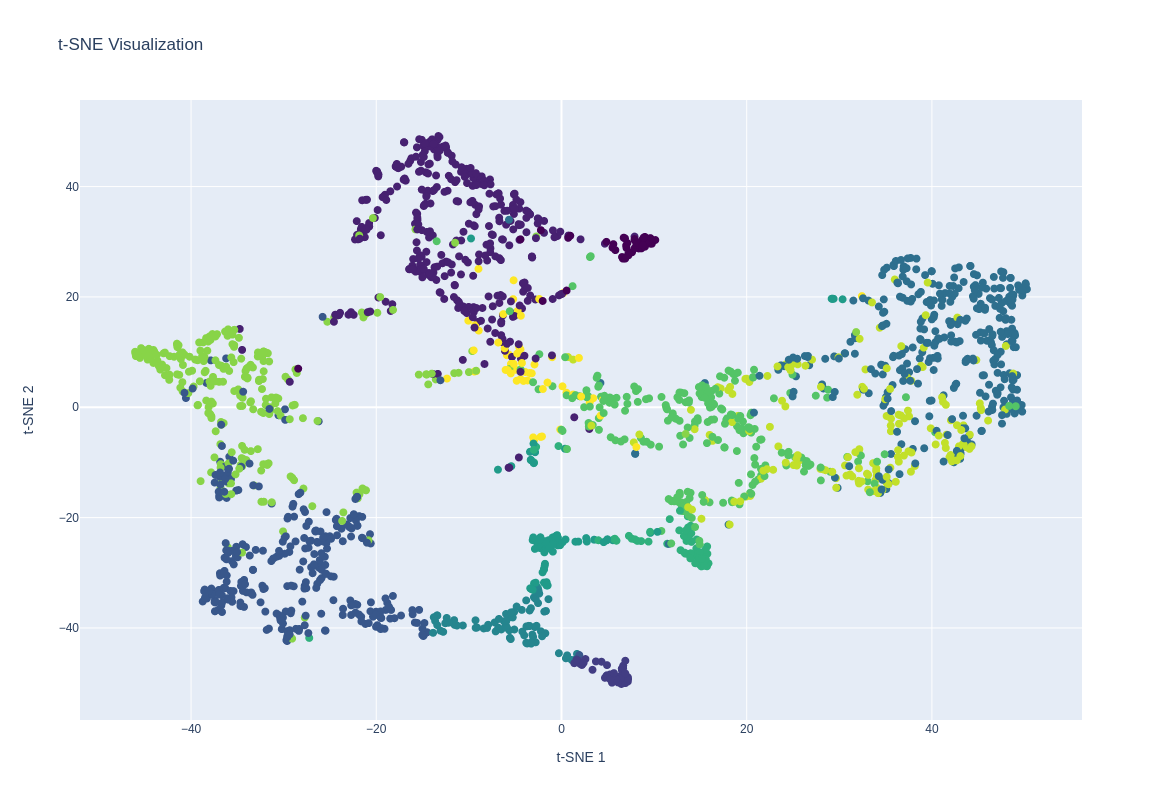

In [44]:
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

# t-SNE
tsne = TSNE(n_components=2, random_state=2000)
ChrB_tsne = tsne.fit_transform(ChrB.iloc[:, 6:18])  # Adjust the column range as per your data

# Create a DataFrame for t-SNE results
ChrB_tsne_df = pd.DataFrame(data=ChrB_tsne, columns=['TSNE1', 'TSNE2'])
ChrB_tsne_df['Script_type_ICDAR2017'] = ChrB['Script_type_ICDAR2017']

# Convert script types to numeric labels
label_encoder = LabelEncoder()
ChrB_tsne_df['Script_type_Labels'] = label_encoder.fit_transform(ChrB_tsne_df['Script_type_ICDAR2017'])

# Get the unique script types in the desired order
script_types = ["1_Caroline", "2_Cursiva", "3_Half_Uncial", "4_Humanistic", "5_Humanistic_Cursive", "6_Hybrida",
                "7_Praegothica", "8_Semihybrida", "9_Semitextualis", "10_Textualis_meridionalis", "11_Textualis",
                "12_Uncial"]

# Visualize t-SNE using Plotly
fig_tsne = go.Figure(data=go.Scatter(x=ChrB_tsne_df['TSNE1'], y=ChrB_tsne_df['TSNE2'], mode='markers',
                                    marker=dict(color=ChrB_tsne_df['Script_type_Labels'], size=8,
                                                colorscale='Viridis', showscale=False),
                                    text=ChrB_tsne_df['Script_type_ICDAR2017'], hoverinfo='text'))
fig_tsne.update_layout(title='t-SNE Visualization', xaxis_title='t-SNE 1', yaxis_title='t-SNE 2')
fig_tsne.update_layout(width=1000, height=800)  # Increase the size of the figure
fig_tsne.show()

# Save the figure as an HTML page
fig_tsne.write_html("../out/ScriptClasses_tsne_visualization.html")